In [49]:
library(ggplot2)
library(dplyr)
library(qvalue)

In [50]:
Giordanos_selection = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/neuro_5CV_filt.tsv"
G_file = read.csv(Giordanos_selection, sep = "\t")
G_file$gene = G_file$gene_ids.0
nrow(G_file)
head(G_file,2)

[1] 16369

index,gene_ids.0,gene
OR4F5,ENSG00000186092,ENSG00000186092
RP11-34P13.8,ENSG00000239945,ENSG00000239945


In [51]:
# df_common_genes = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/")
# common_genes = as.character(df_common_genes$gene)
# length(common_genes)

In [52]:
# Giordanos_selection = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/metadata/ensembl_gene/Ensembl_75_Gene_CV_quant5.txt"
# G_file = read.csv(Giordanos_selection, sep = "\t")
# nrow(G_file)
# head(G_file,2)

In [53]:
# Annas_selection = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/ips_genes_assessed.csv"
# A_file = read.csv(Annas_selection)
# A_file$gene = gsub("_.*","",A_file$genes)
# nrow(A_file)
# head(A_file,2)

In [54]:
##### Mean

In [55]:
mean_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/mean/"

In [56]:
# my_folder1 = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs
# my_folder2 = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206_baynorm/") # baynorm, 20PCs

In [57]:
my_folder2 = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_baynorm_libsize_206/") # baynorm, 20PCsR
my_folder3 = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_sctransform_libsize_206/") # sctransform, 20PCs

In [61]:
# df = read.csv(paste0(my_folder1,"top_qtl_results_all.txt"), sep = "\t")
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/results_neuro/mean_top_qtl_results_all.txt", sep = "\t")
df = df[df$feature_id %in% G_file$gene,]
# df = df[df$feature_id %in% common_genes,]
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues

In [62]:
df0 = read.csv(paste0(my_folder2,"top_qtl_results_all.txt"), sep = "\t")
df0 = df0[df0$feature_id %in% G_file$gene,]
# df0 = df0[df0$feature_id %in% common_genes,]
df0$q_value = qvalue(df0$empirical_feature_p_value)$qvalues

In [74]:
df1 = read.csv(paste0(my_folder3,"top_qtl_results_all.txt"), sep = "\t")
df1 = df1[df1$feature_id %in% G_file$gene,]
# df1 = df1[df1$feature_id %in% common_genes,]
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues

In [75]:
tail(df,2)
tail(df0,2)
tail(df1,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,q_value
26404,4_159650783_A_G,0.01767168,-0.18609516,0.07844086,0.2026819,4,159593277,159630775,635,154,0.9681188,11.835519,4,159650783,G,1,0.2142857,0.8107744,ENSG00000171503,0.2413812
26407,4_159490434_A_G,0.15277008,0.07152682,0.05002522,0.7915350,4,159587831,159593407,635,154,1.0099599,9.540907,4,159490434,G,1,0.1655844,1.0000000,ENSG00000205208,0.5957468


,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,q_value
26398,4_159650783_A_G,0.005908915,-0.16536242,0.06007077,0.1237487,4,159593277,159630775,635,154,0.8467265,14.058508,4,159650783,G,1,0.2142857,0.8107744,ENSG00000171503,0.1881446
26401,4_159650684_T_C,0.057799822,0.09508651,0.05011905,0.3351334,4,159587831,159593407,635,154,1.1991712,9.224251,4,159650684,C,1,0.1980519,0.4456192,ENSG00000205208,0.3623994


,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,q_value
23106,4_159650783_A_G,0.01197260,-0.16201277,0.06447112,0.2205221,4,159593277,159630775,635,154,0.8902505,16.07042,4,159650783,G,1,0.2142857,0.8107744,ENSG00000171503,0.2423140
23109,4_159620035_A_C,0.07400803,0.06974702,0.03903976,0.8476128,4,159587831,159593407,635,154,0.8270924,20.90578,4,159620035,C,1,0.3474026,0.3789527,ENSG00000205208,0.5830625


In [76]:
nrow(df)
nrow(df0)
nrow(df1)

[1] 10623

[1] 10623

[1] 10623

In [77]:
length(unique(df[df$q_value < 0.05,"feature_id"]))
length(unique(df0[df0$q_value < 0.05,"feature_id"]))
length(unique(df1[df1$q_value < 0.05,"feature_id"]))

[1] 3168

[1] 2720

[1] 3296

In [16]:
# res = read.csv(paste0(my_folder1,"qtl_results_all.txt"), sep = "\t")

In [66]:
res0 = read.csv(paste0(my_folder2,"qtl_results_all.txt"), sep = "\t")

In [67]:
res1 = read.csv(paste0(my_folder3,"qtl_results_all.txt"), sep = "\t")

In [78]:
dfp1 = inner_join(df[df$q_value < 0.05,], res0, 
                  by=c("feature_id","snp_id"), suffix = c(".scran",".baynorm"))

Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

In [79]:
nrow(dfp1)

[1] 3190

In [80]:
cor.test(dfp1$beta.scran, dfp1$beta.baynorm)


	Pearson's product-moment correlation

data:  dfp1$beta.scran and dfp1$beta.baynorm
t = 274.75, df = 3188, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9780736 0.9808894
sample estimates:
      cor 
0.9795294 


In [81]:
cor.test(-log10(dfp1$p_value.scran), -log10(dfp1$p_value.baynorm))


	Pearson's product-moment correlation

data:  -log10(dfp1$p_value.scran) and -log10(dfp1$p_value.baynorm)
t = 161.62, df = 3188, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9401430 0.9477012
sample estimates:
      cor 
0.9440459 


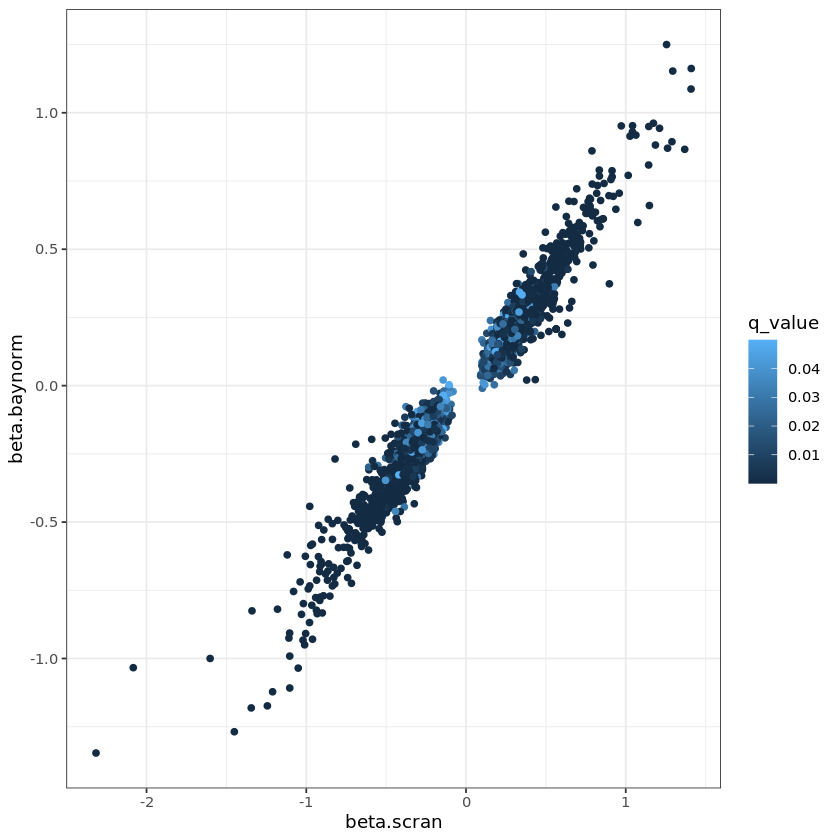

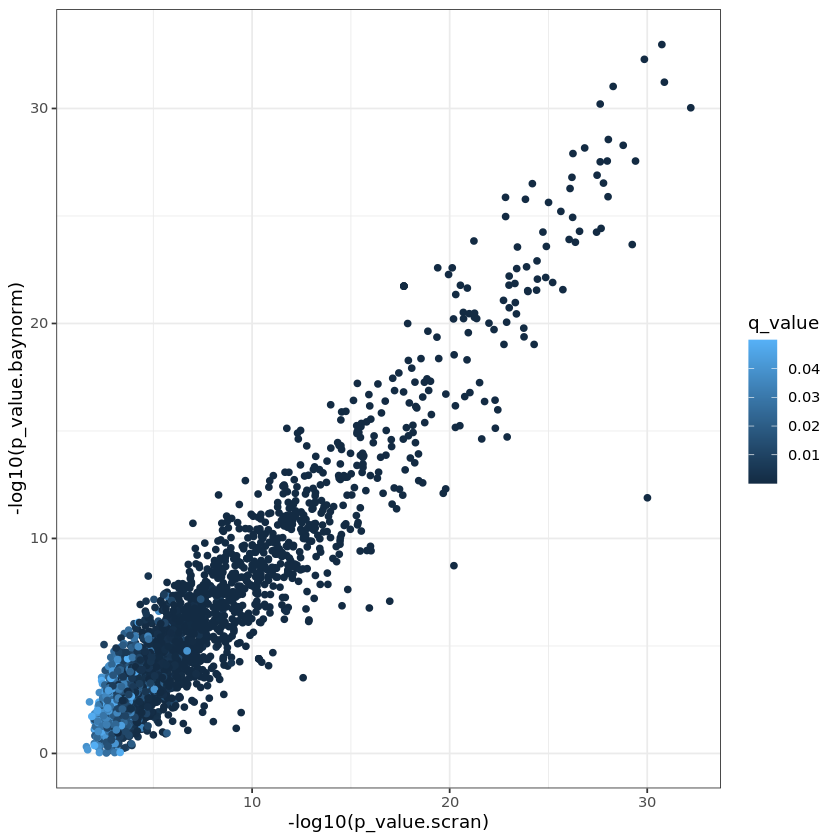

In [82]:
ggplot(dfp1, aes(x = beta.scran, y = beta.baynorm, colour = q_value)) + geom_point() + theme_bw()
ggplot(dfp1, aes(x = -log10(p_value.scran), y = -log10(p_value.baynorm), colour = q_value)) + geom_point() + theme_bw()

In [83]:
dfp2 = inner_join(df[df$q_value < 0.05,], res1, by=c("feature_id","snp_id"), suffix = c(".scran",".sctransform"))

Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

In [84]:
nrow(dfp2)

[1] 3190

In [85]:
cor.test(dfp2$beta.scran, dfp2$beta.sctransform)


	Pearson's product-moment correlation

data:  dfp2$beta.scran and dfp2$beta.sctransform
t = 334.03, df = 3188, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9850147 0.9869451
sample estimates:
      cor 
0.9860129 


In [86]:
cor.test(-log10(dfp2$p_value.scran), -log10(dfp2$p_value.sctransform))


	Pearson's product-moment correlation

data:  -log10(dfp2$p_value.scran) and -log10(dfp2$p_value.sctransform)
t = 233.1, df = 3188, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9699041 0.9737551
sample estimates:
      cor 
0.9718945 


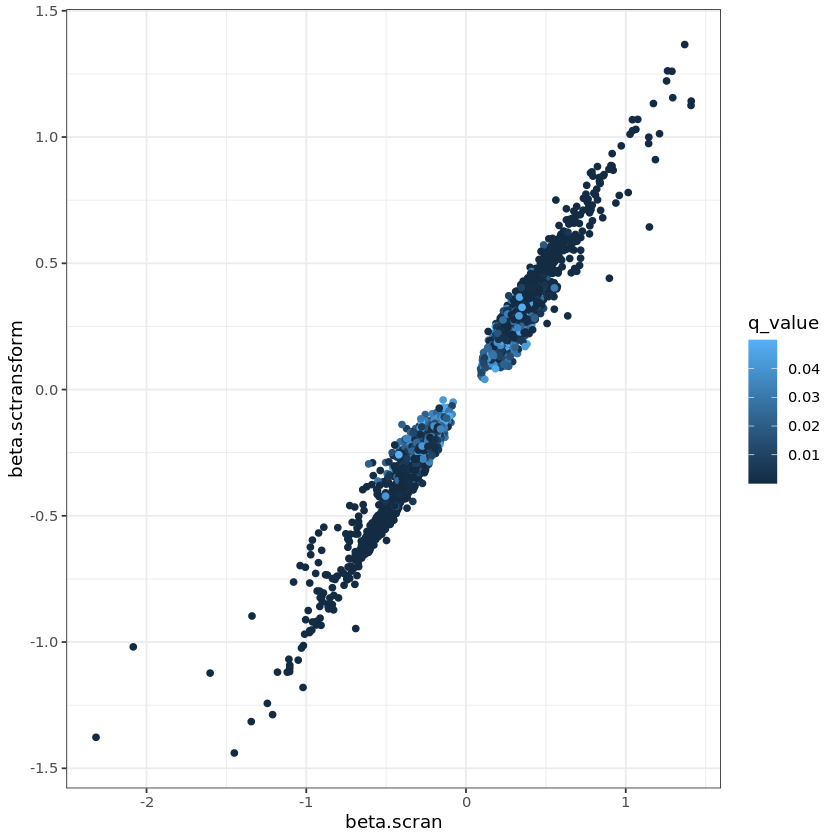

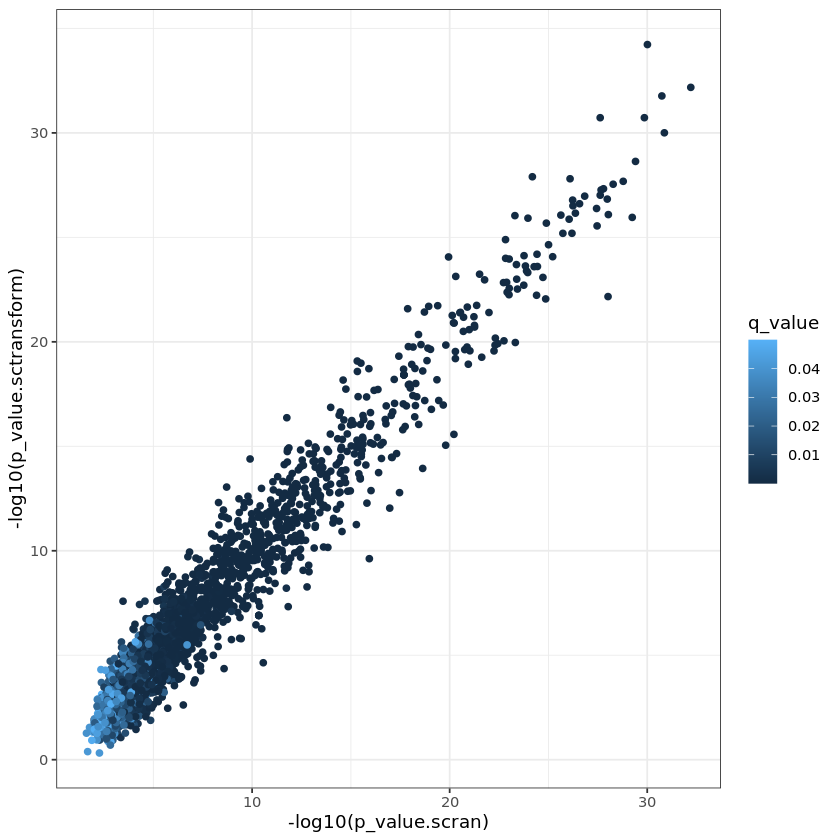

In [87]:
ggplot(dfp2, aes(x = beta.scran, y = beta.sctransform, colour = q_value)) + geom_point() + theme_bw()
ggplot(dfp2, aes(x = -log10(p_value.scran), y = -log10(p_value.sctransform), colour = q_value)) + geom_point() + theme_bw()

In [ ]:
## Replication

In [35]:
##### m-bulk
bulk_matched_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkDay0Healthy_PCA20_88_206/"
res_m = read.csv(paste0(bulk_matched_folder,"qtl_results_all.txt"), sep = "\t")

In [36]:
leads = read.csv(paste0(bulk_matched_folder,"top_qtl_results_all.txt"), sep = "\t")
leads = leads[leads$feature_id %in% common_genes,]
leads$q_value = qvalue(leads$empirical_feature_p_value)$qvalues
max_qval = max(leads[leads$q_value < 0.1,'q_value'])
emp_pv_star_matched = max(leads[leads$q_value==max_qval,"empirical_feature_p_value"])

In [42]:
emp_pv_star_matched

[1] 0.05473347

In [37]:
##### a-bulk
bulk_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkTotal_PCA20/"
res_all = read.csv(paste0(bulk_folder,"qtl_results_all.txt"), sep = "\t")

In [38]:
leads_all = read.csv(paste0(bulk_folder,"top_qtl_results_all.txt"), sep = "\t")
leads_all = leads_all[leads_all$feature_id %in% common_genes,]
leads_all$q_value = qvalue(leads_all$empirical_feature_p_value)$qvalues
max_qval = max(leads_all[leads_all$q_value < 0.1,'q_value'])
emp_pv_star_all = max(leads_all[leads_all$q_value==max_qval,"empirical_feature_p_value"])
emp_pv_star_all

[1] 0.4923506

In [48]:
# scran
df_sign = df[df$q_value < 0.05,]
df3 = inner_join(df_sign, res_m, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star_matched & 
         (df3$beta.sc*df3$beta.bulk)>0),])
df3 = inner_join(df_sign, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star_all & 
         (df3$beta.sc*df3$beta.bulk)>0),])

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 897

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1383

In [46]:
# baynorm
df0_sign = df0[df0$q_value < 0.05,]
df3 = inner_join(df0_sign, res_m, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star_matched & 
         (df3$beta.sc*df3$beta.bulk)>0),])
df3 = inner_join(df0_sign, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star_all & 
         (df3$beta.sc*df3$beta.bulk)>0),])

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 650

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1456

In [47]:
# sctransform
df1_sign = df1[df1$q_value < 0.05,]
df3 = inner_join(df1_sign, res_m, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star_matched & 
         (df3$beta.sc*df3$beta.bulk)>0),])
df3 = inner_join(df1_sign, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
nrow(df3[(df3$empirical_feature_p_value.bulk < emp_pv_star_all & 
         (df3$beta.sc*df3$beta.bulk)>0),])

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 704

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 1698

In [16]:
df0 = read.csv(paste0(my_folder1,"top_qtl_results_all.txt"), sep = "\t")
mean_genes = unique(df0$feature_id)
length(mean_genes)

[1] 50425

In [17]:
##### Total Mean

In [18]:
total_mean_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/"

In [19]:
my_folder = paste0(total_mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [20]:
# df = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
# df <- df[order(df$empirical_feature_p_value, df$p_value ),]
# df0 <- df[-which(duplicated(df$feature_id)),]
# totmean_genes = unique(df0$feature_id)
# length(totmean_genes)

In [21]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
totmean_genes = unique(df0$feature_id)
length(totmean_genes)

[1] 50429

In [22]:
##### Median

In [23]:
median_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/median/"

In [24]:
my_folder = paste0(median_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [26]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
median_genes = unique(df0$feature_id)
length(median_genes)

[1] 13628

In [27]:
# df0 = df0[df0$feature_id %in% common_genes,]
# length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = "BH")
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df2 = df0[df0$feature_id %in% A_file$gene,]
length(unique(df2$feature_id))
df2$BH_fdr = p.adjust(df2$empirical_feature_p_value, method = "BH")
length(unique(df2[df2$BH_fdr < 0.05,'feature_id']))

[1] 13567

[1] 1499

[1] 10227

[1] 1129

In [ ]:
##### Total Median

In [29]:
totmedian_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmedian/"

In [30]:
my_folder = paste0(totmedian_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [31]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
totmedian_genes = unique(df0$feature_id)
length(totmedian_genes)

[1] 12727

In [31]:
##### Sum

In [32]:
sum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/sum/"

In [33]:
my_folder = paste0(sum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") # edgeR, 20PCs

In [34]:
df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df0 <- df0[-which(duplicated(df0$feature_id)),]
sum_genes = unique(df0$feature_id)
length(sum_genes)

[1] 50427

In [35]:
##### Total Sum

In [36]:
total_sum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totsum/"

In [37]:
my_folder = paste0(total_sum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") # edgeR, 20PCs

In [38]:
df = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
df <- df[order(df$empirical_feature_p_value, df$p_value ),]
df0 <- df[-which(duplicated(df$feature_id)),]
# nrow(df0)
length(unique(df0$feature_id))

[1] 50429

In [39]:
# df0 = df0[df0$feature_id %in% common_genes,]
# length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = "BH")
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
df2 = df0[df0$feature_id %in% A_file$gene,]
length(unique(df2$feature_id))
df2$BH_fdr = p.adjust(df2$empirical_feature_p_value, method = "BH")
length(unique(df2[df2$BH_fdr < 0.05,'feature_id']))

[1] 20545

[1] 1109

[1] 10767

[1] 823

In [40]:
# df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
totsum_genes = unique(df0$feature_id)
length(totsum_genes)

[1] 50429

In [41]:
genes0 = mean_genes[mean_genes %in% totmean_genes]
length(genes0)
genes1 = genes0[genes0 %in% sum_genes]
length(genes1)
genes2 = genes1[genes1 %in% totsum_genes]
length(genes2)
common_genes = genes2
genes3 = genes2[genes2 %in% median_genes]
length(genes3)
genes4 = genes3[genes3 %in% totmedian_genes]
length(genes4)
common_genes = genes4

[1] 50425

[1] 50416

[1] 50416

[1] 13628

[1] 12726

In [42]:
length(common_genes)

[1] 12726

In [43]:
write.csv(data.frame(genes = common_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/common_genes_across_all_aggregation_methods.csv")

In [44]:
write.csv(data.frame(genes = mean_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/mean_genes.csv")
write.csv(data.frame(genes = totmean_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/totmean_genes.csv")
write.csv(data.frame(genes = median_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/median_genes.csv")
write.csv(data.frame(genes = totmedian_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/totmedian_genes.csv")
write.csv(data.frame(genes = sum_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/sum_genes.csv")
write.csv(data.frame(genes = totsum_genes), "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/totsum_genes.csv")

In [41]:
median = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/median_genes.csv")
median_genes = (unique(median$genes))

In [53]:
length(common_genes)
length(common_genes[common_genes %in% G_file$gene])
length(common_genes[common_genes %in% A_file$gene])

[1] 13177

[1] 13117

[1] 9886

In [426]:
# df0 = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df0 = df0[df0$feature_id %in% common_genes,]
length(unique(df0$feature_id))

[1] 48570

In [427]:
# df = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
# df <- df[order(df$empirical_feature_p_value, df$p_value ),]
# df0 <- df[-which(duplicated(df$feature_id)),]
# nrow(df0)

In [428]:
# totsum_genes = df0$feature_id

In [429]:
# length(totmean_genes)
# length(totmean_genes[totmean_genes %in% common_genes])

In [430]:
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))

[1] 19876

In [431]:
df1$BH_fdr = p.adjust(df1$empirical_feature_p_value, method = "BH")
length(unique(df1[df1$BH_fdr < 0.05,'feature_id']))
# c(nrow(df1[df1$BH_fdr < 0.05,]), nrow(df1[df1$BH_fdr < 0.05,])/nrow(df1))

[1] 1433

In [432]:
df2 = df0[df0$feature_id %in% A_file$gene,]
length(unique(df2$feature_id))

[1] 10408

In [433]:
df2$BH_fdr = p.adjust(df2$empirical_feature_p_value, method = "BH")
length(unique(df2[df2$BH_fdr < 0.05,'feature_id']))
# c(nrow(df2[df2$BH_fdr < 0.05,]), nrow(df2[df2$BH_fdr < 0.05,])/nrow(df2))

[1] 1045